### IAA002 - LPA - Trabalho
---

#### Importação de bibliotecas

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

---
### 1 Análise Exploratória dos dados


In [46]:
# a. Carregue a base de dados media_precos_carros_brasil.csv

precos_carros_df = pd.read_csv('precos_carros_brasil.csv')
precos_carros_df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [47]:
precos_carros_df.shape

(267542, 11)

In [48]:
# b. Verifique se há valores faltantes nos dados
precos_carros_df.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [49]:
# Caso haja, escolha uma tratativa para resolver o problema de valores faltantes. 
# Por se tratarem de linhas em branco vou optar pela estratégia de remoção.
precos_carros_df.dropna(how='all', inplace=True)
precos_carros_df.shape

(202297, 11)

In [50]:
# c. Verifique se há dados duplicados nos dados
precos_carros_df.duplicated().sum()

2

In [51]:
# removendo dois itens duplicados
precos_carros_df.drop_duplicates(inplace=True)
precos_carros_df.shape

(202295, 11)

In [52]:
# d. Crie duas categorias, para separar colunas numéricas e categóricas. 
numericas_cols = [col for col in precos_carros_df.columns if precos_carros_df[col].dtype != 'object']
categoricas_cols = [col for col in precos_carros_df.columns if precos_carros_df[col].dtype == 'object']

In [53]:
# Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)
precos_carros_df[numericas_cols].describe().round(1)

,year_of_reference,year_model,avg_price_brl
count,202295.0,202295.0,202295.0
mean,2021.6,2011.3,52756.8
std,0.6,6.4,51628.9
min,2021.0,2000.0,6647.0
25%,2021.0,2006.0,22855.0
50%,2022.0,2012.0,38027.0
75%,2022.0,2016.0,64064.0
max,2023.0,2023.0,979358.0


In [54]:
# Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)
precos_carros_df[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


In [55]:
# e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)
precos_carros_df['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [56]:
# e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)
precos_carros_df['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

#### f. Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados

* A marca mais vendida em 2021 foi a Fiat com 44962 carros vendidos.
* Os modelos mais vendido em 2021 foram Palio Week. Adv/Adv TRYON 1.8 mpi Flex e Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p, ambos com 425 unidades vendidas.
* O mês com mais vendas foi o de Janeiro/2021, totalizando 24260 carros.
* O preço médio dos veículos vendidos em 2021 foi de R$ 52.756.80

---
### 2 Visualização dos dados

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64


[Text(0, 0, '44962'),
 Text(0, 0, '44312'),
 Text(0, 0, '38590'),
 Text(0, 0, '33150'),
 Text(0, 0, '29191'),
 Text(0, 0, '12090')]

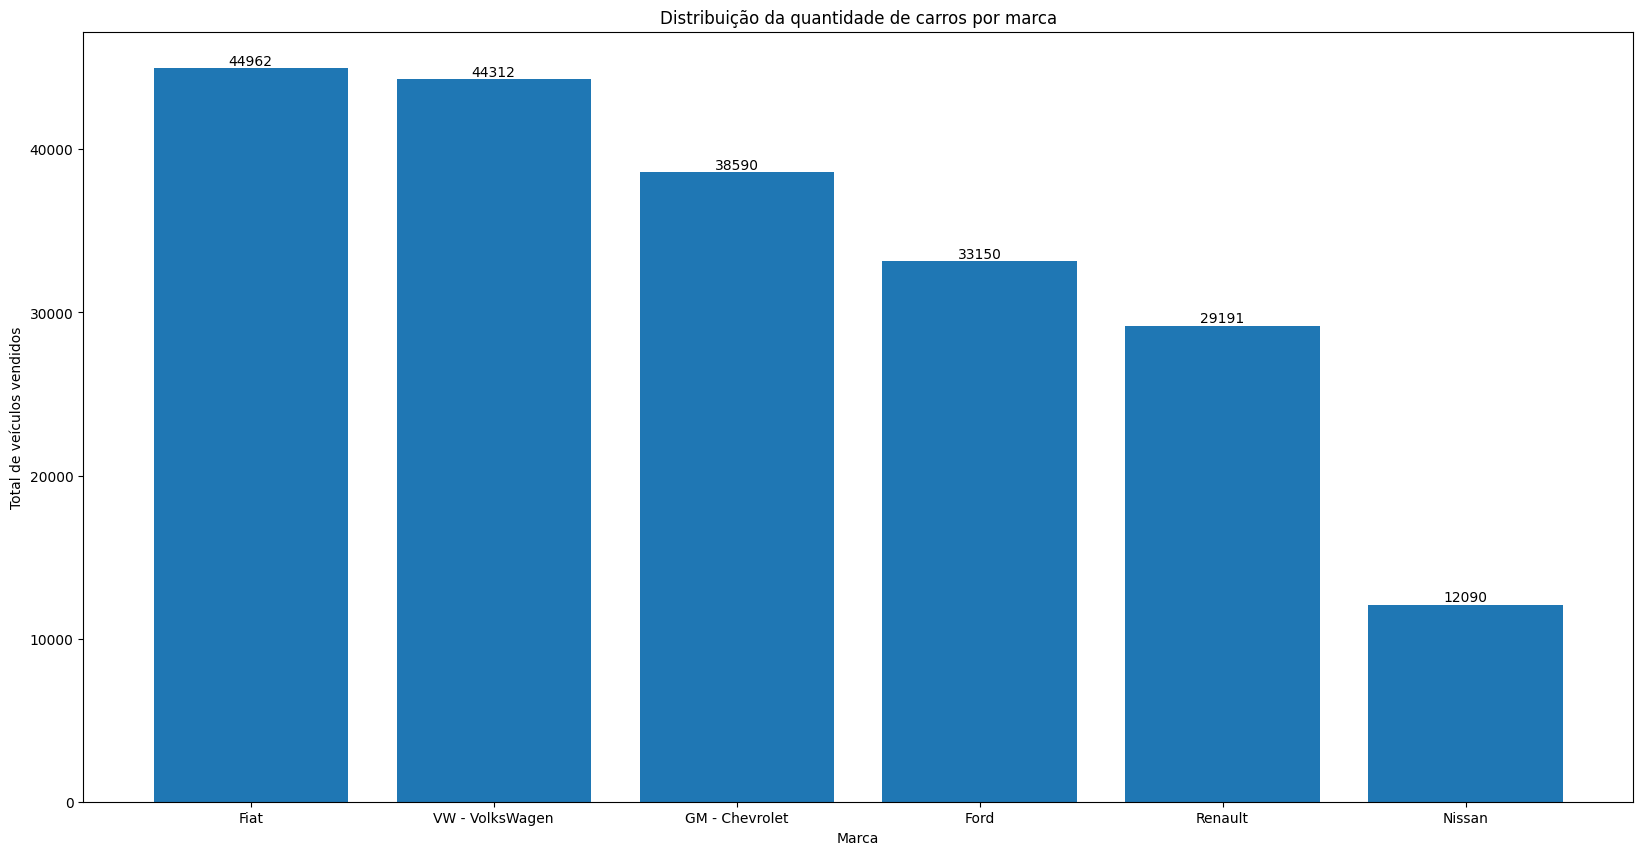

In [68]:
# a. Gere um gráfico da distribuição da quantidade de carros por marca

agrupador_carros_por_marca = precos_carros_df['brand'].value_counts()
print(agrupador_carros_por_marca)
plt.figure(figsize=(20,10))
grafico_carros_por_marca = plt.bar(agrupador_carros_por_marca.index, agrupador_carros_por_marca.values)
plt.title('Distribuição da quantidade de carros por marca')
plt.xlabel('Marca')
plt.ylabel('Total de veículos vendidos')
plt.bar_label(grafico_carros_por_marca, size=10)

gear
manual       161883
automatic     40412
Name: count, dtype: int64


[Text(0, 0, '161883'), Text(0, 0, '40412')]

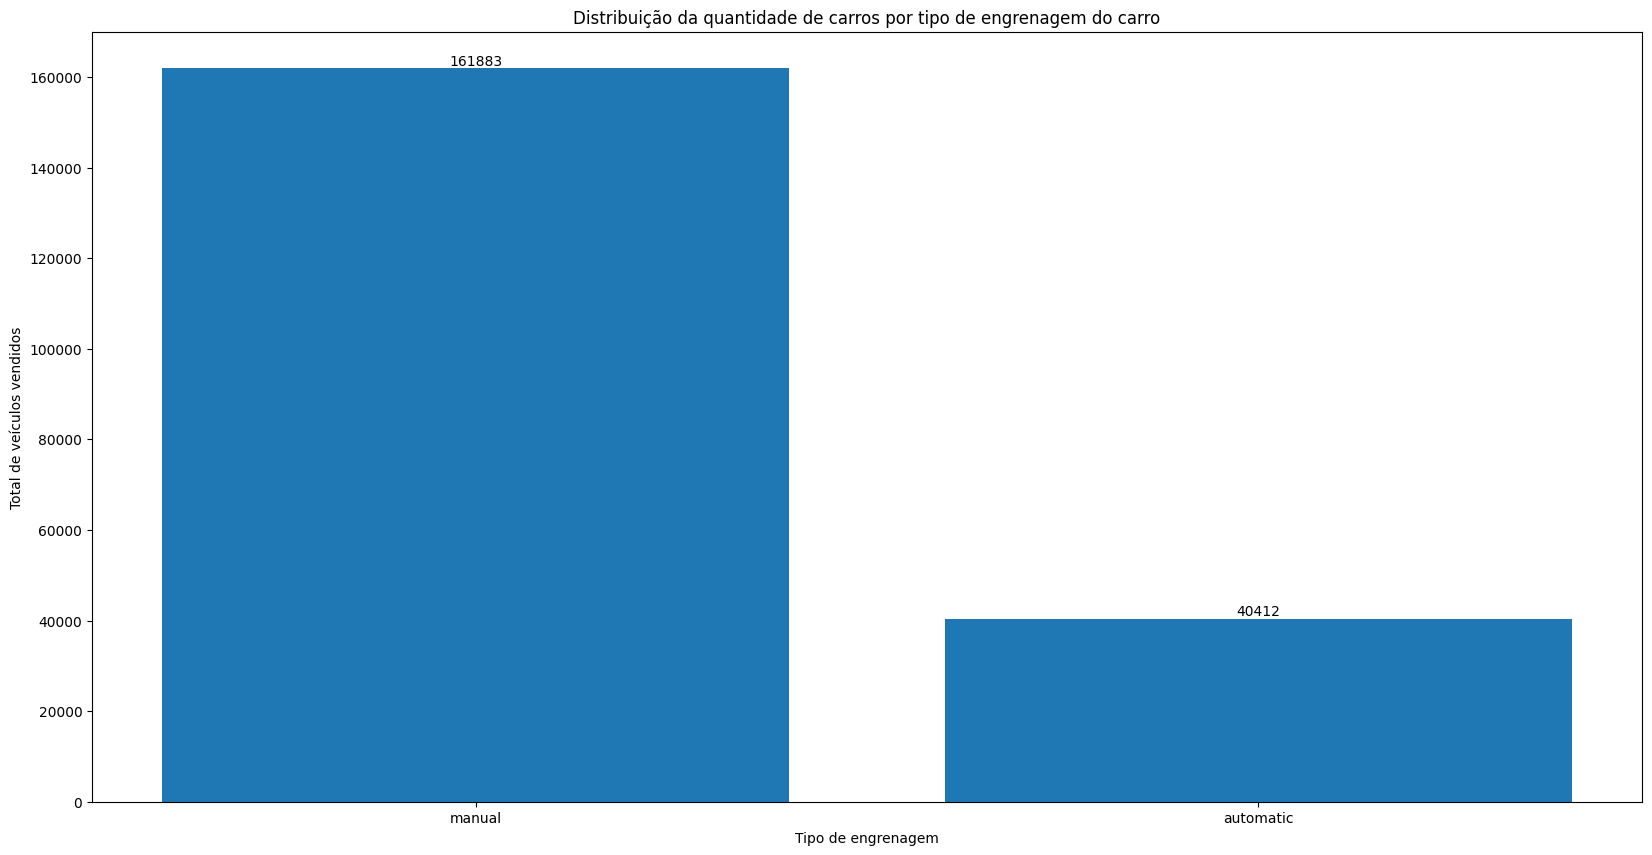

In [74]:
# b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro (gear)

agrupador_carros_por_engrenagem = precos_carros_df['gear'].value_counts()
print(agrupador_carros_por_engrenagem)
plt.figure(figsize=(20,10))
grafico_carros_por_engrenagem = plt.bar(agrupador_carros_por_engrenagem.index, agrupador_carros_por_engrenagem.values)
plt.title('Distribuição da quantidade de carros por tipo de engrenagem do carro')
plt.xlabel('Tipo de engrenagem')
plt.ylabel('Total de veículos vendidos')
plt.bar_label(grafico_carros_por_engrenagem, size=10)

month_of_reference
January      51905.0
February     49197.0
March        50083.0
April        50849.0
May          51481.0
June         52514.0
July         53059.0
August       53664.0
September    54405.0
October      54903.0
November     55468.0
December     55848.0
Name: avg_price_brl, dtype: float64


Text(0.5, 1.0, 'Evolução da média de preço dos carros ao longo dos meses de 2022')

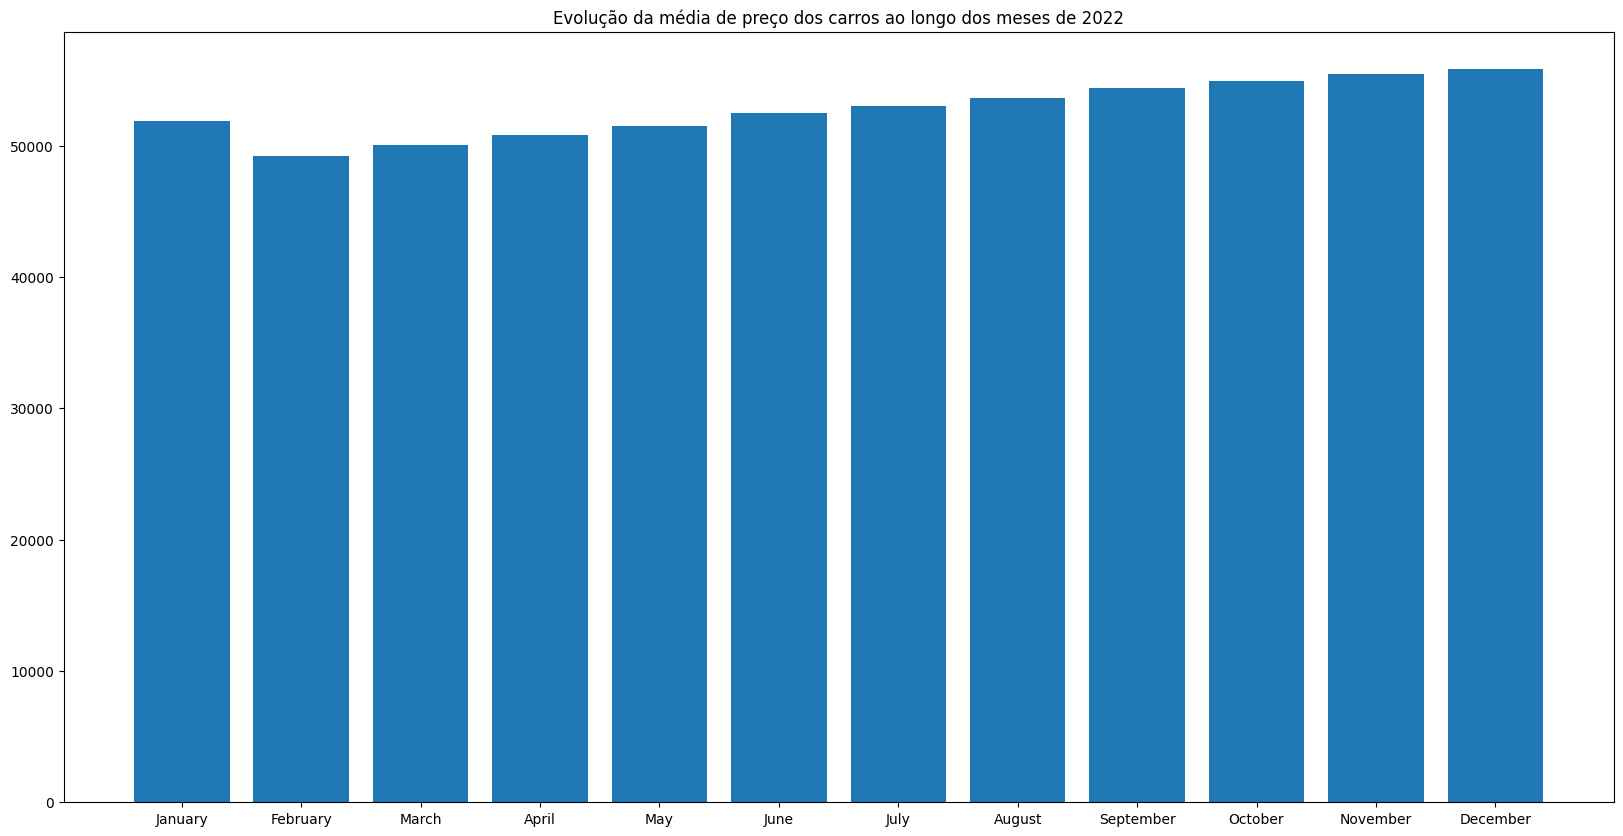

In [ ]:
# Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)
media_preco_carro = precos_carros_df.groupby(['month_of_reference'])['avg_price_brl'].mean().round(0)
ordem_meses = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
media_preco_carro = media_preco_carro.reindex(ordem_meses)
print(media_preco_carro)
plt.figure(figsize=(20,10))
grafico_media_preco = plt.bar(media_preco_carro.index, media_preco_carro.values)
plt.title('Evolução da média de preço dos carros ao longo dos meses de 2022')
plt.xlabel('Mês')
plt.ylabel('Média de preço')